# TMA4106 - Numerical Derivatives and Heat Equation

This notebook includes solutions to all tasks in the TMA4106 assignment, including numerical differentiation and solving the heat equation with three methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

## Part 1–3: Numerical Derivatives

In [2]:
f = lambda x: np.exp(x)
x0 = 1.5
true_deriv = np.exp(x0)

hs = [10**(-i) for i in range(1, 18)]
forward_error = []
centered_error = []
richardson_error = []

for h in hs:
    D1 = (f(x0 + h) - f(x0)) / h
    forward_error.append(abs(D1 - true_deriv))

    D2 = (f(x0 + h) - f(x0 - h)) / (2 * h)
    centered_error.append(abs(D2 - true_deriv))

    D4 = (f(x0 - 2*h) - 8*f(x0 - h) + 8*f(x0 + h) - f(x0 + 2*h)) / (12 * h)
    richardson_error.append(abs(D4 - true_deriv))

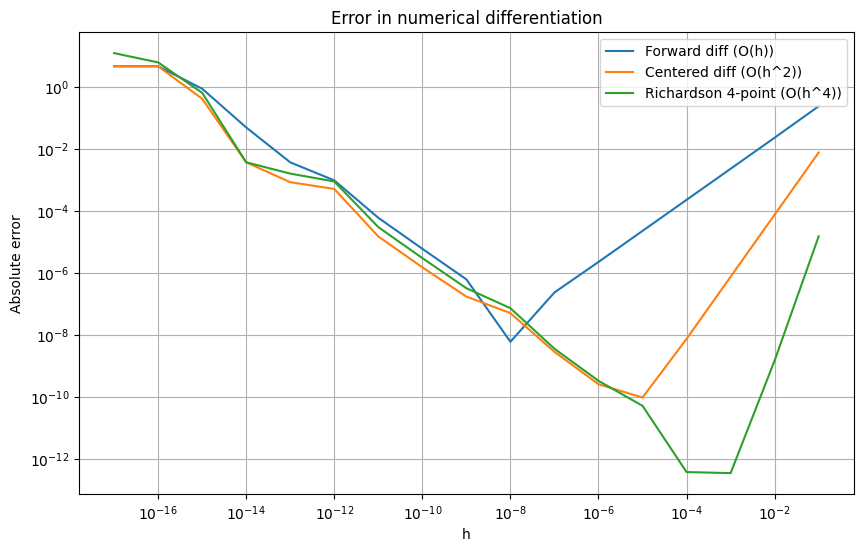

In [3]:
plt.figure(figsize=(10, 6))
plt.loglog(hs, forward_error, label='Forward diff (O(h))')
plt.loglog(hs, centered_error, label='Centered diff (O(h^2))')
plt.loglog(hs, richardson_error, label='Richardson 4-point (O(h^4))')
plt.xlabel('h')
plt.ylabel('Absolute error')
plt.title('Error in numerical differentiation')
plt.legend()
plt.grid(True)
plt.show()

## Part 4–6: Solving the Heat Equation with Explicit, Implicit, and Crank-Nicolson Methods

In [4]:
# Parameters
L = 1
T = 1
nx = 20
nt = 100
h = L / nx
k = T / nt
alpha = k / h**2

x = np.linspace(0, L, nx+1)
t = np.linspace(0, T, nt+1)
u0 = np.sin(np.pi * x)

In [5]:
# Explicit method
u_explicit = np.zeros((nt+1, nx+1))
u_explicit[0, :] = u0
for j in range(0, nt):
    for i in range(1, nx):
        u_explicit[j+1, i] = alpha * (u_explicit[j, i+1] - 2*u_explicit[j, i] + u_explicit[j, i-1]) + u_explicit[j, i]

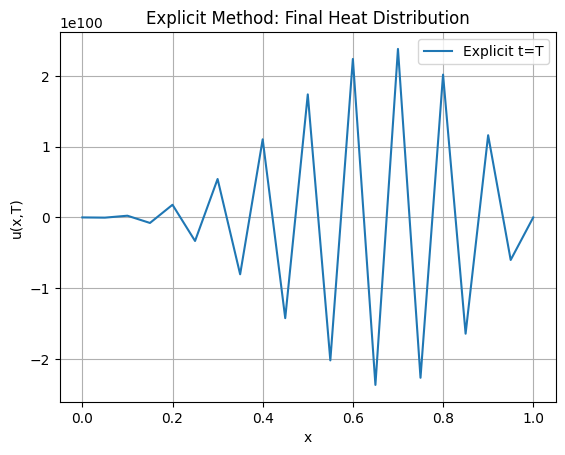

In [6]:
plt.plot(x, u_explicit[-1, :], label='Explicit t=T')
plt.title('Explicit Method: Final Heat Distribution')
plt.xlabel('x')
plt.ylabel('u(x,T)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
# Implicit method
A_diag = (1 + 2*alpha) * np.ones(nx-1)
A_off = -alpha * np.ones(nx-2)
ab = np.zeros((3, nx-1))
ab[0, 1:] = A_off
ab[1, :] = A_diag
ab[2, :-1] = A_off

u_implicit = np.zeros((nt+1, nx+1))
u_implicit[0, :] = u0
for j in range(0, nt):
    b = u_implicit[j, 1:-1]
    u_implicit[j+1, 1:-1] = solve_banded((1, 1), ab, b)

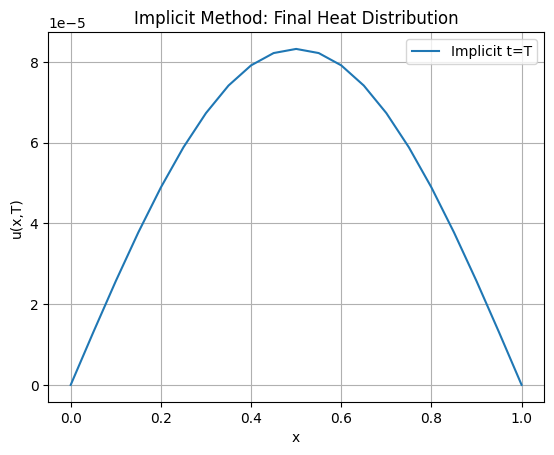

In [8]:
plt.plot(x, u_implicit[-1, :], label='Implicit t=T')
plt.title('Implicit Method: Final Heat Distribution')
plt.xlabel('x')
plt.ylabel('u(x,T)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Crank-Nicolson method
CN_diag = (1 + alpha) * np.ones(nx-1)
CN_off = -alpha/2 * np.ones(nx-2)
ab_CN = np.zeros((3, nx-1))
ab_CN[0, 1:] = CN_off
ab_CN[1, :] = CN_diag
ab_CN[2, :-1] = CN_off

u_cn = np.zeros((nt+1, nx+1))
u_cn[0, :] = u0
for j in range(0, nt):
    rhs = (alpha/2) * u_cn[j, :-2] + (1 - alpha) * u_cn[j, 1:-1] + (alpha/2) * u_cn[j, 2:]
    u_cn[j+1, 1:-1] = solve_banded((1,1), ab_CN, rhs)

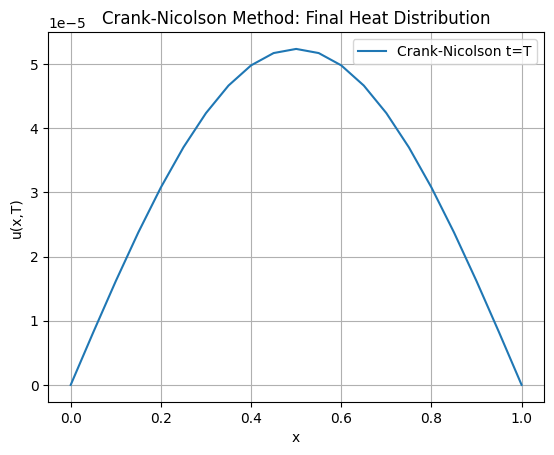

In [10]:
plt.plot(x, u_cn[-1, :], label='Crank-Nicolson t=T')
plt.title('Crank-Nicolson Method: Final Heat Distribution')
plt.xlabel('x')
plt.ylabel('u(x,T)')
plt.grid(True)
plt.legend()
plt.show()